In [1]:
# PreVisulization Of Data
import pandas as pd
import seaborn as sns
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
from functools import partial

ModuleNotFoundError: No module named 'pandas'

A . PreVisulization Of Data

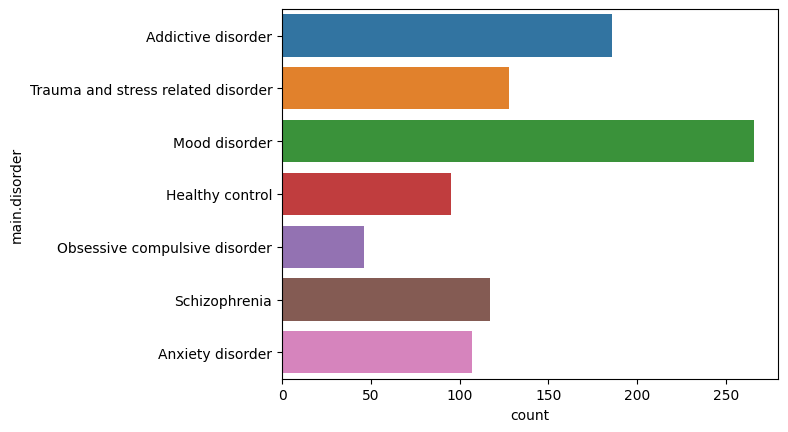

In [ ]:
Dataset = pd.read_csv('EEG.machinelearing_data_BRMH.csv') # Import DataSet
Df = DataFrame(Dataset)
countplot = partial(sns.countplot, data=Df)
countplot(y='main.disorder') #Counting Number of Patient having Particualar Disorder
plt.show()

In [ ]:
df_long = Df.melt(id_vars = ['sex', 'main.disorder', 'specific.disorder'], value_vars=['age', 'education', 'IQ'])

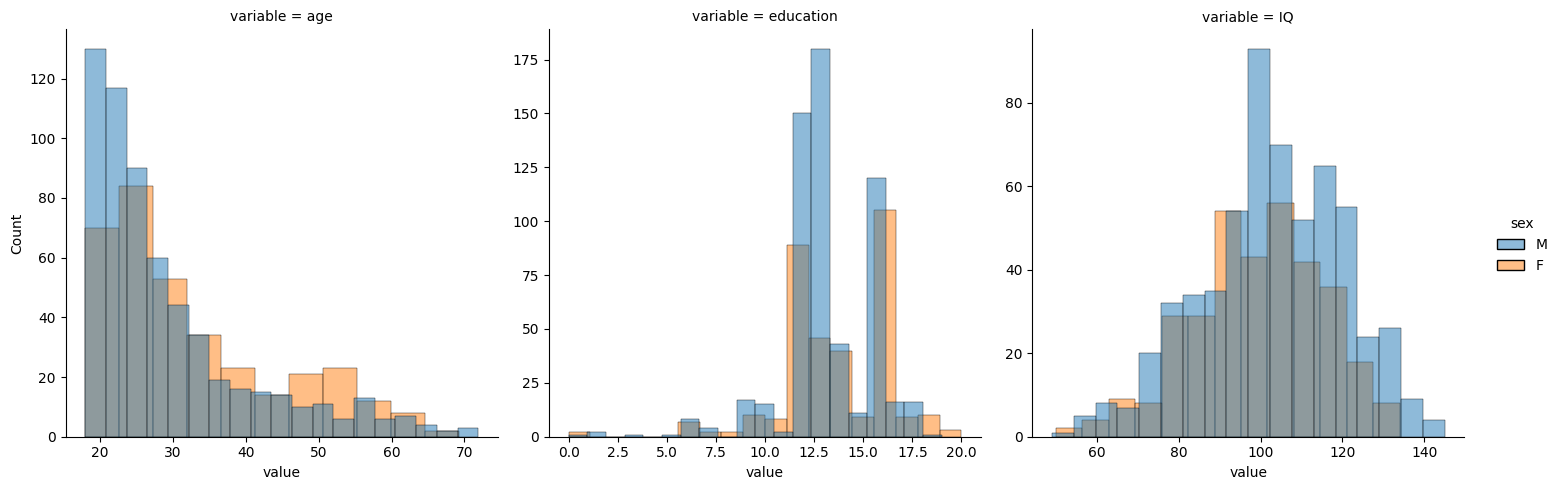

In [ ]:
# How Sex Effecting Data Distributions
displot = partial(sns.displot, 
                  data=df_long, kind='hist', 
                  x='value', col='variable', 
                  col_wrap=3, common_bins=False, 
                  facet_kws={'sharex': False, 'sharey': False})
displot(hue='sex', alpha=0.5)
plt.show()

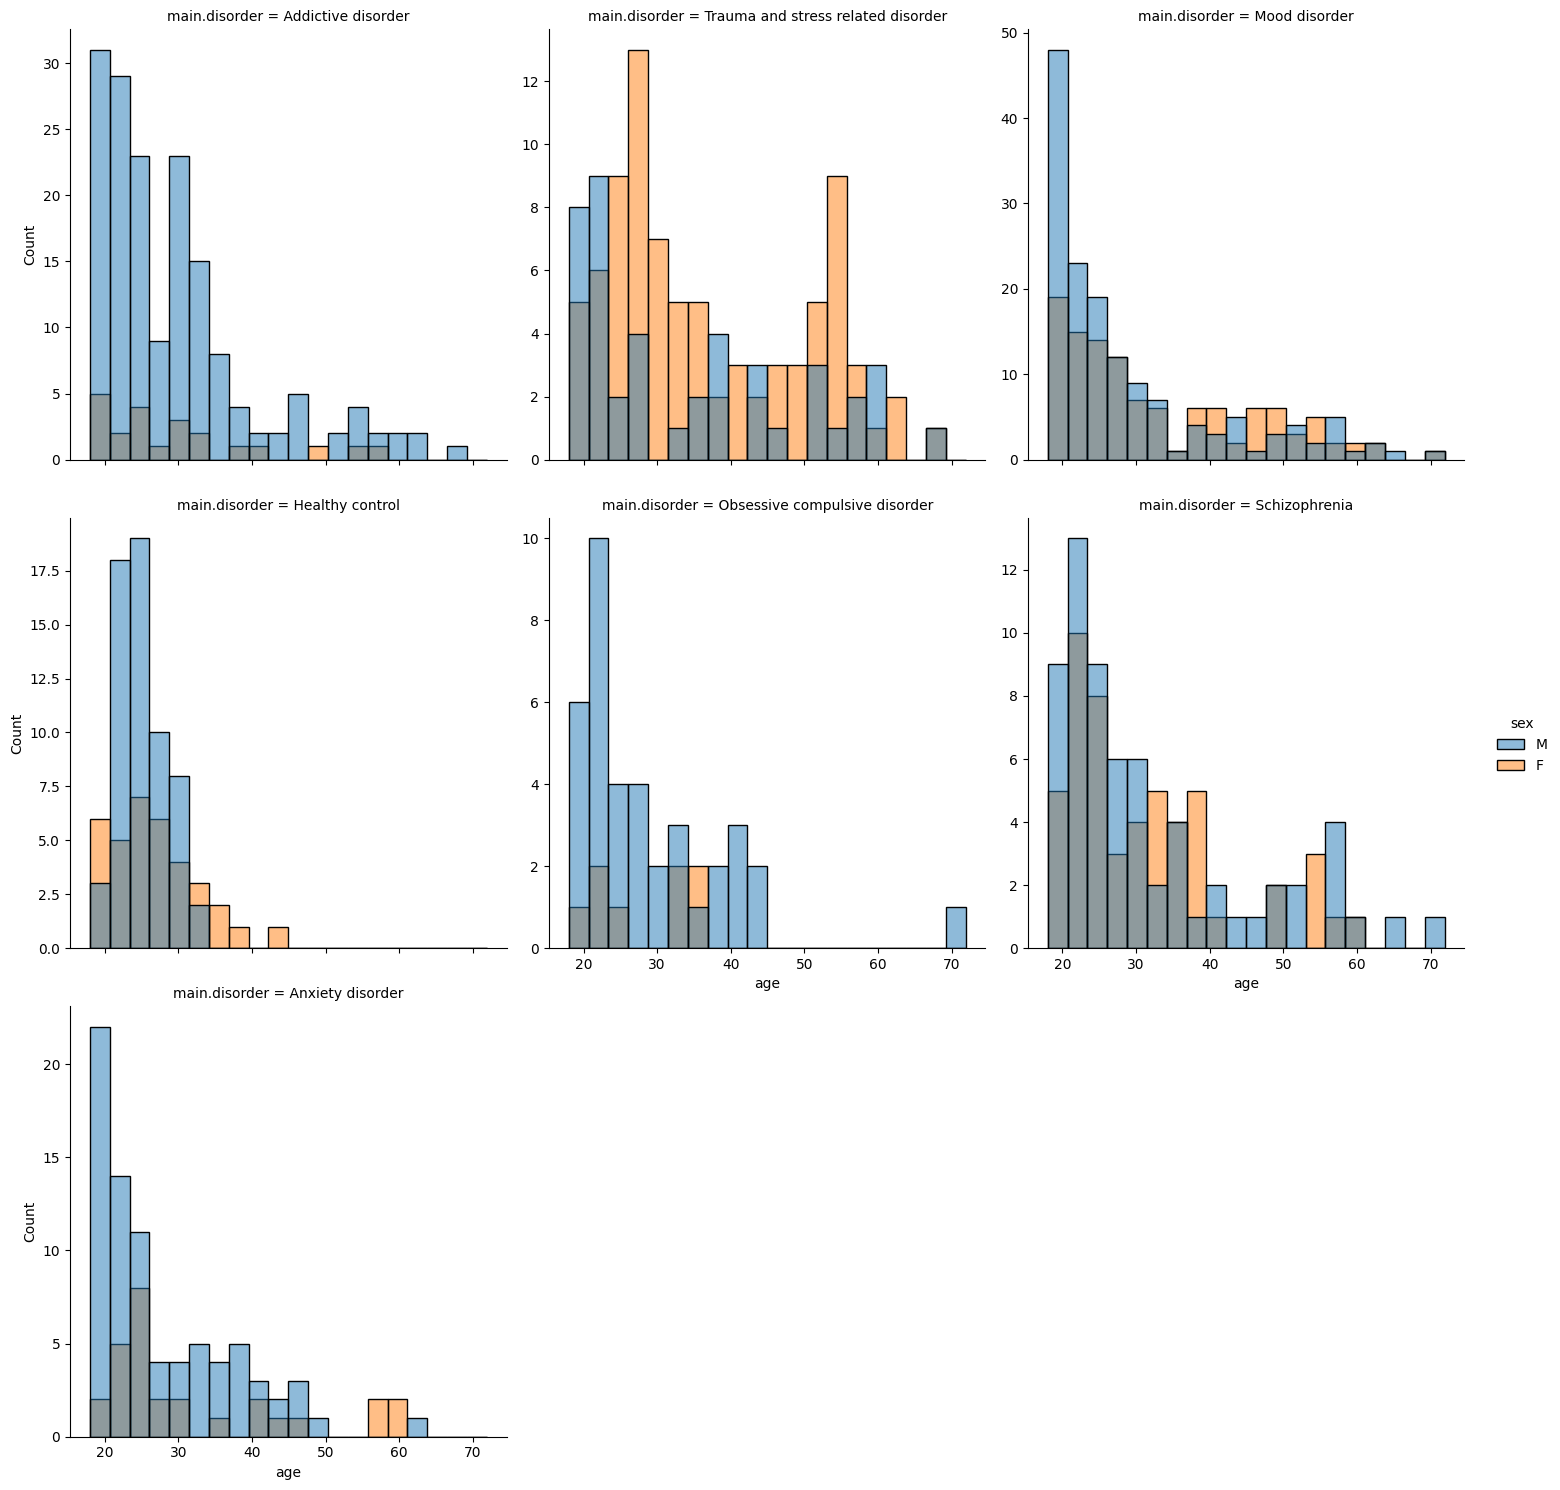

In [ ]:
# How Age Effecting Data Distributions
displot2 = partial(sns.displot,
                  data=Df, kind='hist',  
                  col_wrap=3,facet_kws={'sharey': False})
displot2(x='age', col='main.disorder', hue='sex')
plt.show()

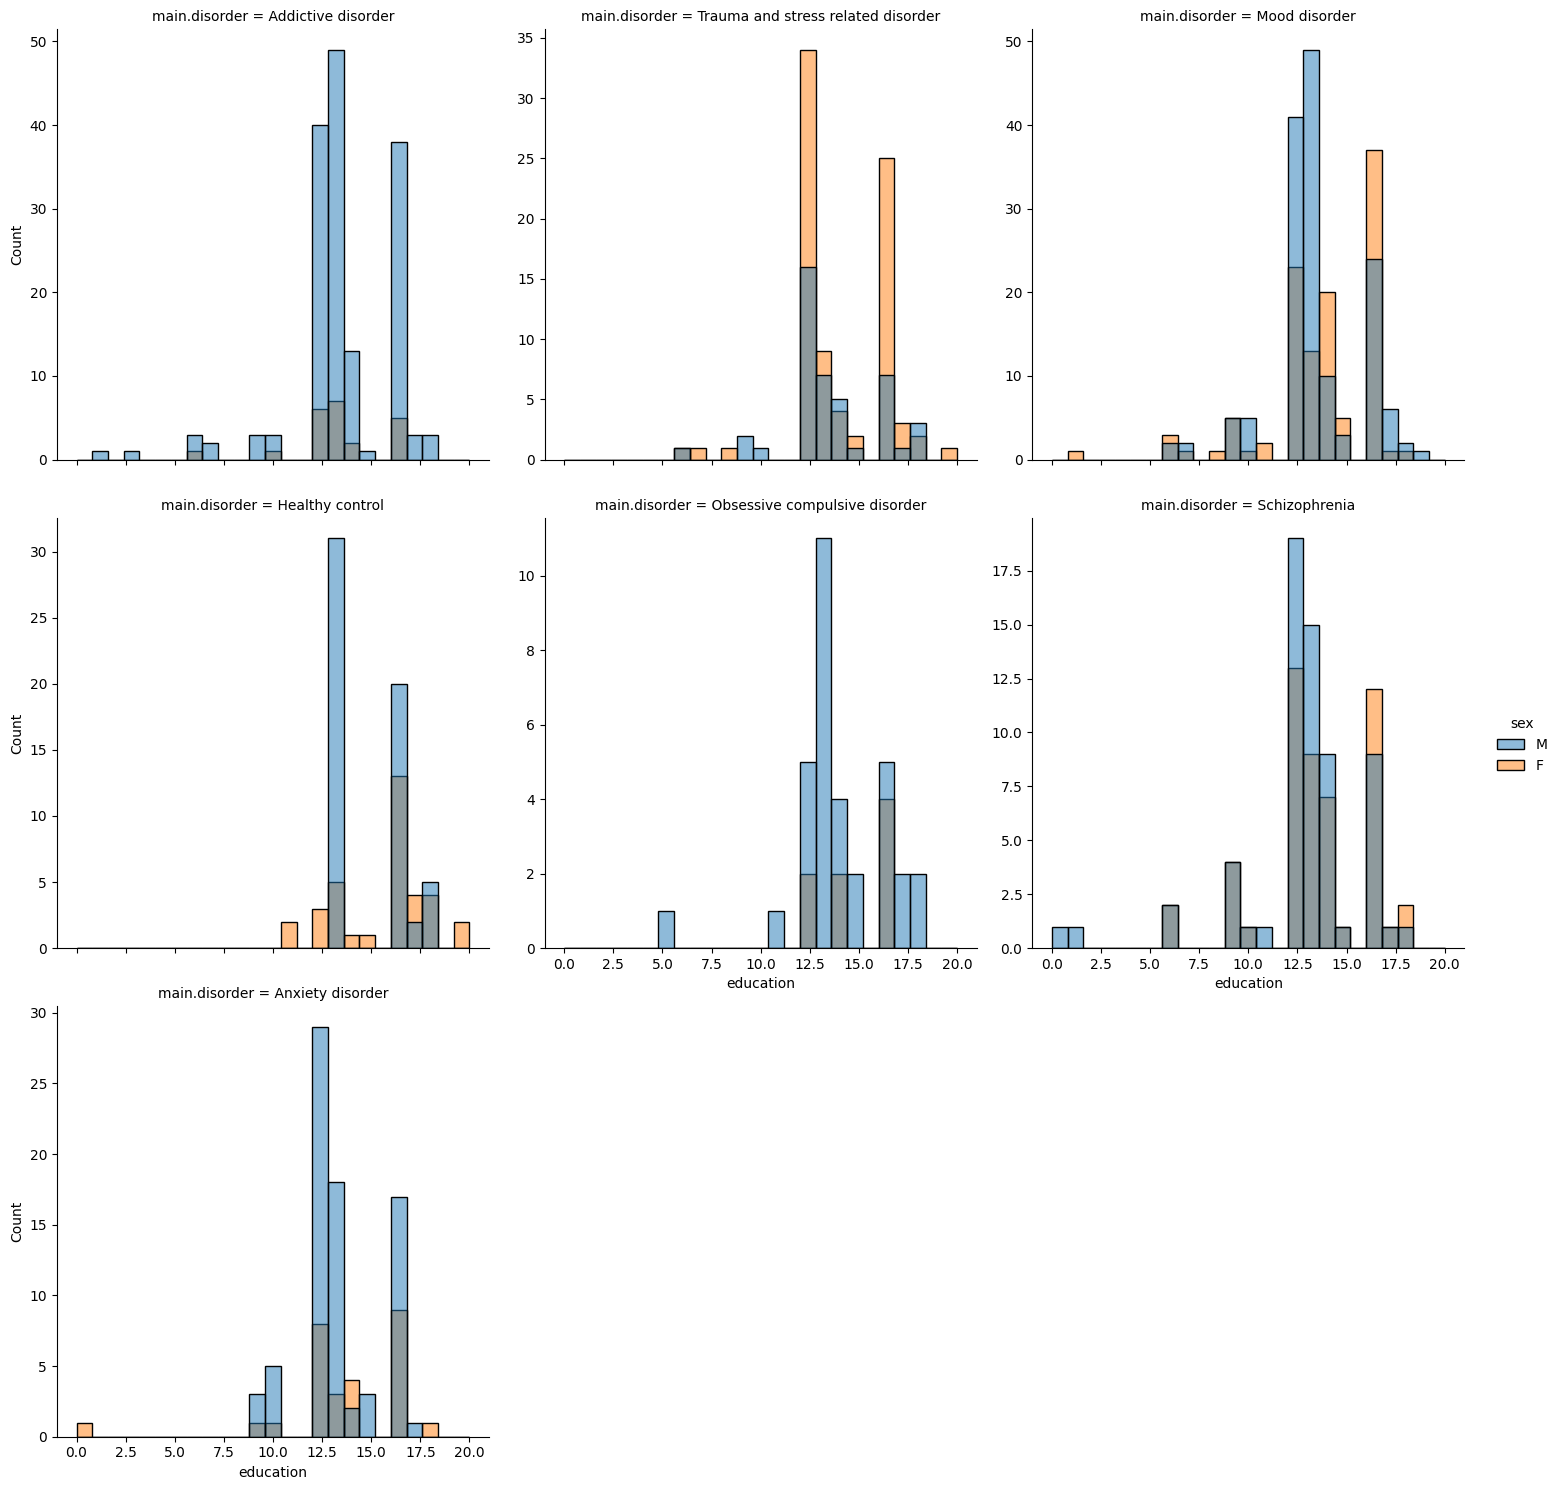

In [ ]:
# How Education Effecting Data Distributions
displot2(x='education', col='main.disorder', hue='sex')
plt.show()

B. Classification Using Gussian Naive Base , Support Vector Machine

In [ ]:
import pandas
from pandas.core.frame import DataFrame
from sklearn import svm, datasets, metrics
from sklearn.naive_bayes import GaussianNB
import seaborn 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
Dataset = pandas.read_csv('EEG.machinelearing_data_BRMH.csv') # Import DataSet
Df = DataFrame(Dataset)
# Select Only Useful Parameters
Columns = ['age','AB.A.delta.a.FP1', 'AB.A.delta.b.FP2', 'AB.A.delta.d.F3', 
                'AB.A.delta.f.F4', 'AB.A.delta.c.F7', 'AB.A.delta.g.F8', 'AB.A.delta.h.T3',
                'AB.A.delta.l.T4', 'AB.A.delta.i.C3', 'AB.A.delta.k.C4', 
                'AB.A.delta.m.T5', 'AB.A.delta.q.T6', 'AB.A.delta.n.P3', 
                'AB.A.delta.p.P4', 'AB.A.delta.r.O1', 'AB.A.delta.s.O2' , 'main.disorder',]
print(len(Columns))
CleanData = Df[['sex','age','AB.A.delta.a.FP1', 'AB.A.delta.b.FP2', 'AB.A.delta.d.F3', 
                'AB.A.delta.f.F4', 'AB.A.delta.c.F7', 'AB.A.delta.g.F8', 'AB.A.delta.h.T3',
                'AB.A.delta.l.T4', 'AB.A.delta.i.C3', 'AB.A.delta.k.C4', 
                'AB.A.delta.m.T5', 'AB.A.delta.q.T6', 'AB.A.delta.n.P3', 
                'AB.A.delta.p.P4', 'AB.A.delta.r.O1', 'AB.A.delta.s.O2' , 'main.disorder',]]
CleanData['sex'] = CleanData.sex.map({'M' : 1 , 'F' : 0})
CleanData.to_csv('CleanDataMl.csv' , index= False)
import pandas
Dataset = pandas.read_csv('/home/tirth/ML Innovative/TirthMl/CleanDataMl.csv')
Df = pandas.DataFrame(Dataset)
Df = Df[ (Df['main.disorder'] == 'Mood disorder') |(Df['main.disorder'] == 'Obsessive compulsive disorder')]
print(Df.shape[0])
X_Training = Df[Columns[0 : len(Columns) - 1]].iloc[range(0 , Df.shape[0] , 2)]
Y_Training  = Df[Columns[len(Columns) - 1]].iloc[range(0 , Df.shape[0] , 2)]
X_Test = Df[Columns[0 : len(Columns) - 1]].iloc[range(1 , Df.shape[0] , 2)]
Y_Test  = Df[Columns[len(Columns) - 1]].iloc[range(1 , Df.shape[0] , 2)]

18
312


/tmp/ipykernel_4099/1618875413.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData['sex'] = CleanData.sex.map({'M' : 1 , 'F' : 0})


Accuracy :  0.8333333333333334
                               precision    recall  f1-score   support

                Mood disorder       0.89      0.93      0.91       137
Obsessive compulsive disorder       0.23      0.16      0.19        19

                     accuracy                           0.83       156
                    macro avg       0.56      0.54      0.55       156
                 weighted avg       0.81      0.83      0.82       156

[[127  10]
 [ 16   3]]


<AxesSubplot: >

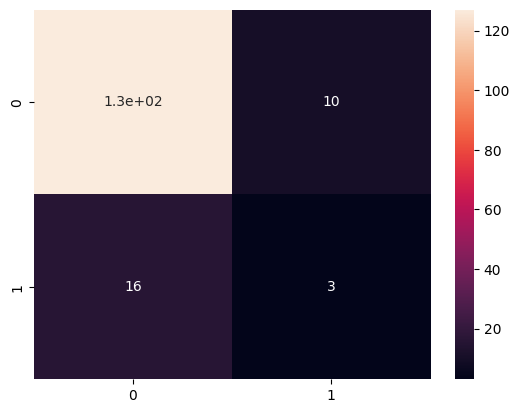

In [ ]:
# Gussion Naive Base Classifier
clfGussian = GaussianNB()
clfGussian.fit(X_Training , Y_Training)
prediction = clfGussian.predict(X_Test)
print("Accuracy : " , metrics.accuracy_score(Y_Test, prediction, normalize=True))
print(metrics.classification_report(Y_Test ,prediction))
print(metrics.confusion_matrix(Y_Test, prediction))
seaborn.heatmap(metrics.confusion_matrix(Y_Test, prediction) , annot = True)

In [ ]:
# Linear Support Vector Classification
clfSvm  = svm.LinearSVC()
clfSvm.fit(X_Training , Y_Training )
prediction2 = clfSvm.predict(X_Test)
print("Accuracy : " , metrics.accuracy_score(Y_Test, prediction2, normalize=True))
print(metrics.classification_report(Y_Test, prediction2))
print(metrics.confusion_matrix(Y_Test, prediction2))

# Parameter Tuning
param_grid = {'C': [0.1, 1, 10, 100, 1000],
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_Training, Y_Training)
grid_predictions = grid.predict(X_Test)
# print classification report
print(classification_report(Y_Test, grid_predictions))

/home/tirth/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy :  0.8589743589743589
                               precision    recall  f1-score   support

                Mood disorder       0.88      0.98      0.92       137
Obsessive compulsive disorder       0.00      0.00      0.00        19

                     accuracy                           0.86       156
                    macro avg       0.44      0.49      0.46       156
                 weighted avg       0.77      0.86      0.81       156

[[134   3]
 [ 19   0]]
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.839 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.839 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.839 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, 

Accuracy =  0.6730769230769231
prediction :  ['Mood disorder' 'Mood disorder' 'Obsessive compulsive disorder'
 'Obsessive compulsive disorder' 'Mood disorder'
 'Obsessive compulsive disorder' 'Mood disorder' 'Mood disorder'
 'Obsessive compulsive disorder' 'Mood disorder'
 'Obsessive compulsive disorder' 'Mood disorder'
 'Obsessive compulsive disorder' 'Mood disorder' 'Mood disorder'
 'Mood disorder' 'Obsessive compulsive disorder' 'Mood disorder'
 'Mood disorder' 'Mood disorder' 'Mood disorder' 'Mood disorder'
 'Mood disorder' 'Mood disorder' 'Mood disorder' 'Mood disorder'
 'Obsessive compulsive disorder' 'Mood disorder'
 'Obsessive compulsive disorder' 'Obsessive compulsive disorder'
 'Obsessive compulsive disorder' 'Obsessive compulsive disorder'
 'Mood disorder' 'Mood disorder' 'Mood disorder' 'Mood disorder'
 'Mood disorder' 'Mood disorder' 'Mood disorder' 'Mood disorder'
 'Mood disorder' 'Obsessive compulsive disorder'
 'Obsessive compulsive disorder' 'Mood disorder' 'Mood disor

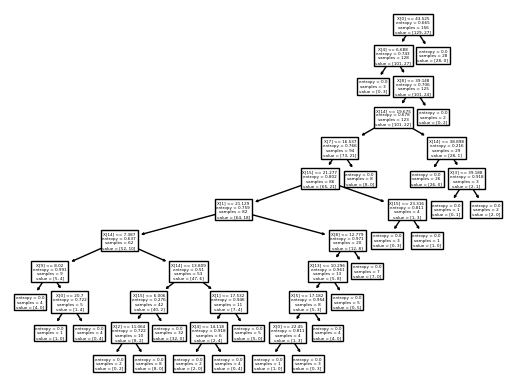

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy')

#Fitting the train and test data

clf.fit(X_Training ,Y_Training)
tree.plot_tree(clf)
#predict using training dataset

prediction = clf.predict(X_Test)
print("Accuracy = ", metrics.accuracy_score(Y_Test,prediction,normalize=True))
print("prediction : ",prediction)
print(metrics.classification_report(Y_Test,prediction))

print(metrics.confusion_matrix(Y_Test,prediction))